# **CMSC320 Final Project: Heart Disease Prediction** (Senthoor Krishnaraju)


 ## Part 1: Introduction 

INTRO:
Explain why we are doing this/point of it
Explain dataset (I think its patients admitted to the hospital and seeing how much of them has heart disease ) 
Cite dataset
Explain what subset we are using (cleveland dataset)

<b>Dataset Chosen</b>: UCI Heart Disease Dataset

<b>Source</b>: https://archive.ics.uci.edu/dataset/45/heart+disease

<b>Why This Dataset?</b>

I chose the UCI Heart Disease Dataset because it’s small but packed with useful medical data. It includes patient information like age, cholesterol levels, blood pressure, and other factors that could indicate 

heart disease. The dataset is well-known and commonly used for machine learning, which makes it perfect for this project.

It’s also great because it allows me to build a classification model to predict whether someone might have heart disease based on their health stats. Since the data is already structured, I won’t have to do too 

much cleaning, but there’s still plenty of room for analysis, visualizations, and machine learning.

GitHub Repo: https://github.com/s-krishnaraju/CMSC320_Final_Project


## Part 2: Data Curation 

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# These are our features
feature_names = ["age",
"sex",
"cp",
"trestbps",
"chol",
"fbs",
"restecg",
"thalach",
"exang",
"oldpeak",
"slope",
"ca",
"thal", 
"heart_disease", 
"stage"]



df = pd.DataFrame(columns=feature_names)

f = open("./cleve.mod")
if f: 
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        if line and line[0] != "%" :
            data = [item.strip() for item in line.split()]
            df.loc[len(df)] = data
                

# Lets look at our data
display(df.head())





,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,stage
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


In [ ]:

# Lets look at somewhere in the middle of our data
display(df.head(-40))

# Oh no! Looks like some values have question marks for them. These are most likely missing values from the dataset. 
# Lets validate each row and remove any rows with missing values 

# Mark a row valid if it doesn't have ? 
df["Valid_Row"] = df.apply(lambda x: False if ("?" in list(x)) else True, axis=1)
# filter the df based on valid rows 
df = df[df["Valid_Row"]]
# finally remove the temporary column we created
df = df.drop("Valid_Row", axis=1)

In [111]:
# EDA:
# First break a couple variables down and how the dataset looks (like count, mean, min max, etc ...)
# (how many males vs females, what is the chest pain reportage look like, 
# how many people have heart disease, mean/median age is it mostly an older population?  ) 
# THEN 
# Do t-test on age and heart disease since we would think that age is a pretty important factor 
# Look at the chest pain they were admitted to the hospital with, any interesting facts like alot of people reporting no chest pain but having heart disease
# Look at porportion of heart disease by gender, do females have a higher porportion or males? 



# FOR ONE HOT ENCODING LATER 
# TRANSFORM HARTDISEASE AND OTHER BINARY INTO NUMBER
# DO HOT ENCONDING ON REST OF CATEGORICAL VARS 
# LEAVE OUT HEART_DISEASE_STAGE WE WILL ONLY TRY TO CLASSIFY SOMEONE AS HAVING HEART DISEASE OR NOT 

# df["heart_disease"] = df["heart_disease"].apply(lambda x: 1 if x=="sick" else 0)
# non_dummy_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
# dummy_features = list(set(feature_names) - set(non_dummy_features))
# df = pd.get_dummies(df, columns=dummy_features, dtype=int)
# print(df)


## Part 3: Exploratory Data Analysis

 ### **Dataset Summary**
 There are 303 entries in our dataset and about 14 features. The dataset has a mix of categorical and both numerical (normally distributed and parametric) data.                   

 Some of the main features are age, sex (1 = male; 0 = female), trestbps (resting blood pressure), chol (total cholesterol levels). 
 
 The target variable that we are trying to predict is the diagnosis of heart disease, and this is represented by the nums field (0 = absence of heart disease; 1-4 = presence of heart disease).

 We also made plots showing the distribution of all the feature variables as well as a heat map showing the correlation of all the features

In [ ]:
# explain num of features 
# how big/shape of our dataset 
# how each variable is represented (they are already encoded. Age is hot encoded )

display(df.shape)

display(df.describe())

display(df.nunique())

(297, 14)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


age              41
sex               2
cp                4
trestbps         50
chol            152
fbs               2
restecg           3
thalach          91
exang             2
oldpeak          40
slope             3
ca                4
thal              3
heartdisease      5
dtype: int64

<Figure size 1200x600 with 0 Axes>

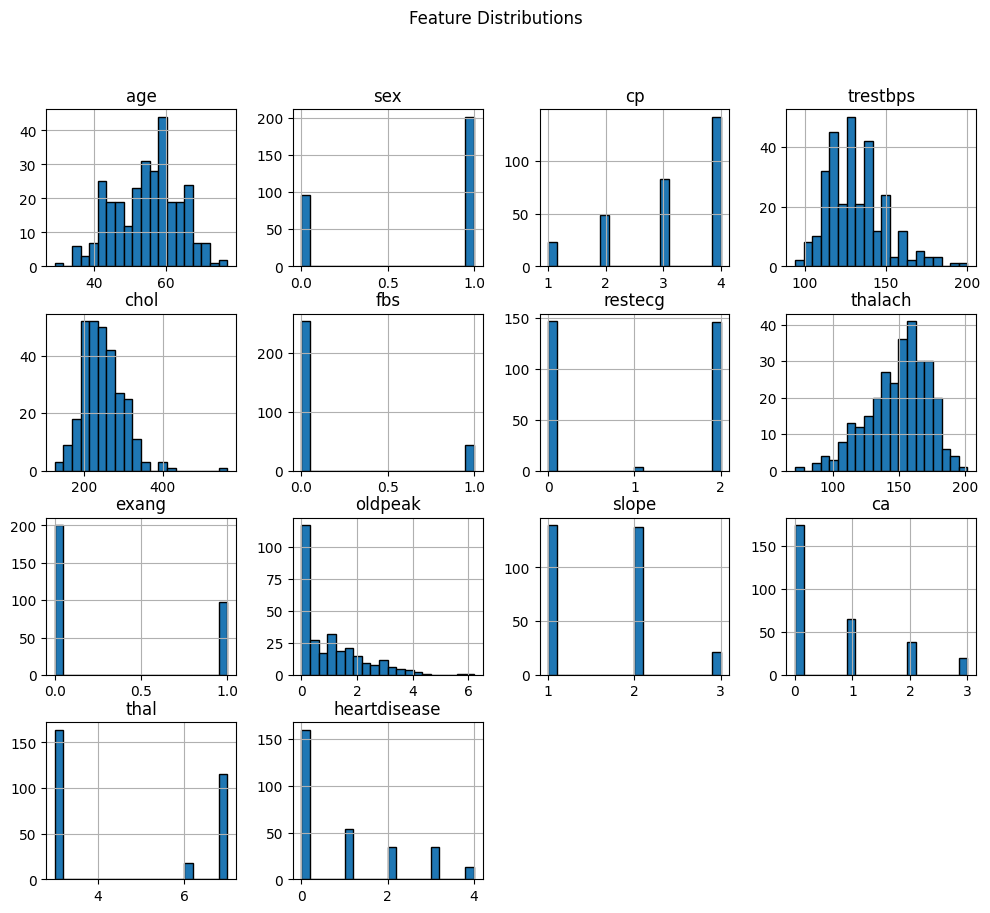

In [ ]:
# Looking at distribution / any outliers for the features 
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

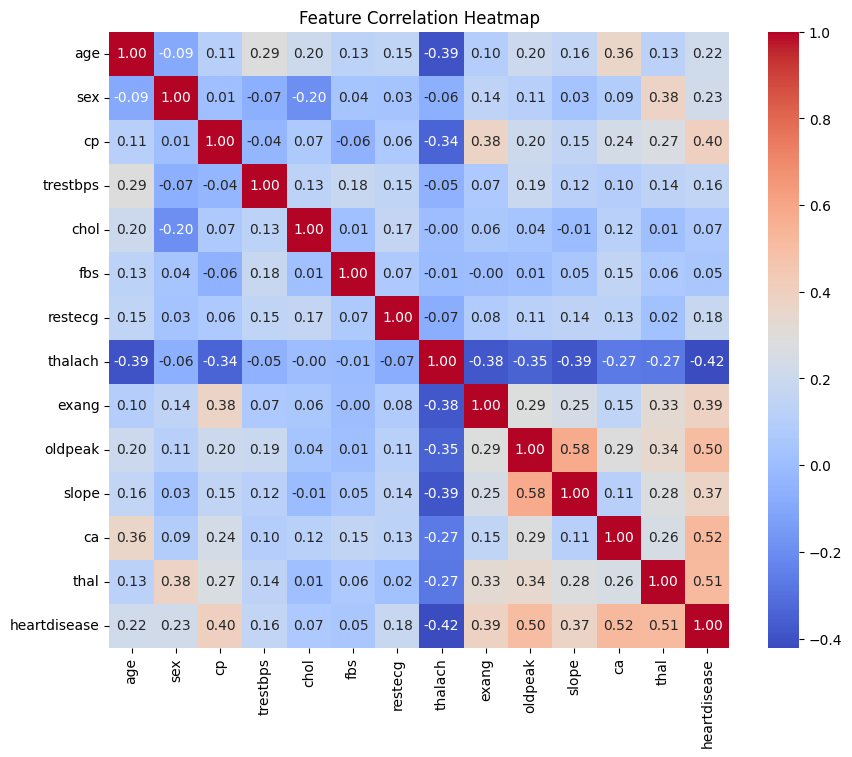

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

### **Age and Heart Disease: T-test**
We conduct a t-test to compare the mean age between patients with and without heart disease to see if there is a relation between age and heart disease. 

H0: The difference between the mean age of patients with and without heart disease is 0
HA: The difference between means is not 0

We end up with a p-value less than our significance level (.05), so we end up rejecting our H0 and accepting our HA that there is a significant difference between means in our two groups 

Ultimately, we can draw the conclusion that the age of a patient is one of the major factors that contribute/correlate to whether or not they have heart disease, and this makes sense since usually older patients are more at risk to diseases like heart disease. We can see this trend in histogram/lineplot graph where the no heart disease group is cleary skewed towards the lower/younger ages.

T-test results for Age distribution: t-stat=-4.064, p-value=0.000


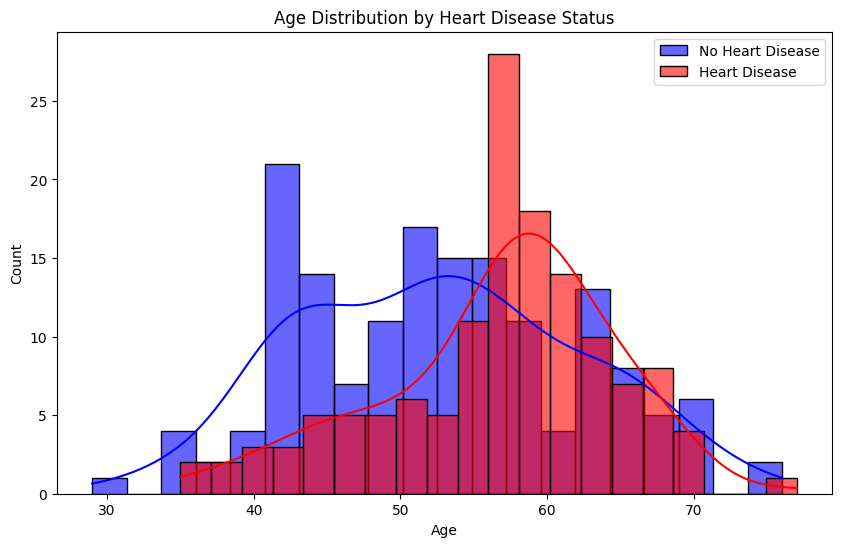

In [ ]:
group_0 = df[df["heart_disease"] == 0]['age']
group_1 = df[df["heart_disease"] > 0]['age']

stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
print(f"T-test results for Age distribution: t-stat={stat:.3f}, p-value={p_value:.3f}")

plt.figure(figsize=(10, 6))
sns.histplot(group_0, label="No Heart Disease", color="blue", kde=True, bins=20, alpha=0.6)
sns.histplot(group_1, label="Heart Disease", color="red", kde=True, bins=20, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Heart Disease Status")
plt.legend()
plt.show()



### **Second Method: Chi-Squared Test**
We conduct a chi squared test in order to see the effect/relationship between the categorical variable, gender, and the presence of heart disease. 

H0: There is no relationship between type of gender and the presence of heart disease 

HA: There is a relationship between the type of gender and the presence of heart disease 

We end up with a p-value less than our sig. level, so we end up rejecting our null hypothesis and accepting our HA, indicating that there is a significant association between gender and presence of heart disease. 

We observe that our bar graph, which shows the porportion of heart disease for each gender, fits our results from the chi squared test since it's clear to see that the porportion of Males with heart disease is significantly higher than that of Females. 

Chi-square test for Gender vs Heart Disease: chi2=21.852, p-value=0.000


<Figure size 800x600 with 0 Axes>

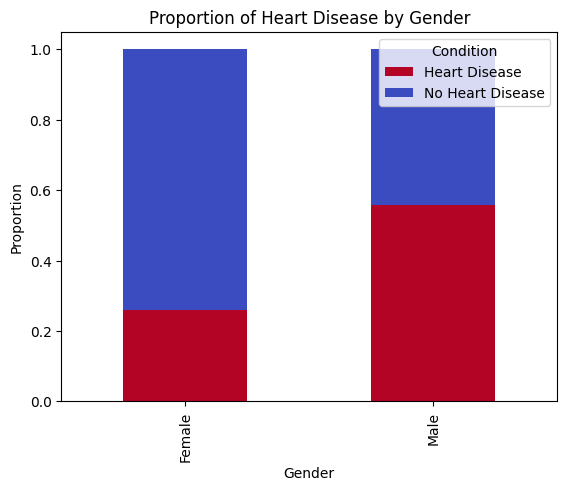

In [ ]:
gender = df["sex"].map({0:"Female", 1:"Male"})
gender_heart_disease = pd.crosstab(gender, df['heart_disease'] > 0).reindex([True, False],axis="columns")
chi2, p, dof, expected = stats.chi2_contingency(gender_heart_disease)

print(f"Chi-square test for Gender vs Heart Disease: chi2={chi2:.3f}, p-value={p:.3f}")

plt.figure(figsize=(8, 6))
gender_heart_disease.div(gender_heart_disease.sum(1), axis=0).plot(kind='bar', stacked=True, colormap='coolwarm_r')
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.title("Proportion of Heart Disease by Gender")
plt.legend(["Heart Disease", "No Heart Disease"], title="Condition")
plt.show()

### **Third Method: Mann-Whitney U Test**
We wanted to look at the relationship of the resting blood pressure of a patient (trestbps) and whether they have heart disease, however one issue we encountered is that the distribution of trestbps (in the previous distribution plots) looks a little off and seems to be skewed left. Since the data for trestbps seems to be not perfectly normal distributed, we decided to use a Mann Whitney U test (instead of t-test) in order to compare the blood pressure of patients with and without heart disease.

H0: There is no significant difference in resting blood pressure between patients with and without heart disease

HA: There is a significant difference in resting blood pressure between the groups

We end up with a p-value less than the sig. level, so we decide to reject the null hypothesis and accept the alternate hypothesis that there is a significant difference in resting blood pressure between patients with and without heart disease. 



Mann-Whitney U test for Resting Blood Pressure: U-statistic=9292.500, p-value=0.023


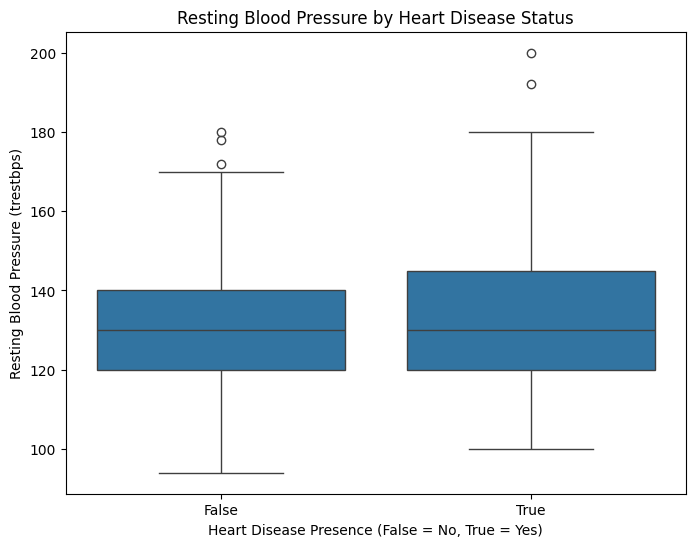

In [ ]:
bp_no_hd = df[df['heart_disease'] == 0]['trestbps']
bp_with_hd = df[df['heart_disease'] > 0]['trestbps']

# Mann-Whitney U Test
stat, p_value = stats.mannwhitneyu(bp_no_hd, bp_with_hd, alternative='two-sided')
print(f"Mann-Whitney U test for Resting Blood Pressure: U-statistic={stat:.3f}, p-value={p_value:.3f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['heart_disease'] > 0, y=df['trestbps'])
plt.xlabel("Heart Disease Presence (False = No, True = Yes)")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.title("Resting Blood Pressure by Heart Disease Status")
plt.show()

### **Conclusions**

We can see that these variables do indeed have a significant relationship with whether a paitent has heart disease

Some interesting ones like the amount of the people who report no chest pain but end up having a heart disease

## Part 4: Primary Analysis: Classification 

give overview of what we are going to do and what models we want to use for classification 

logistic regression (we might have multiconlinearity), Random Forest, Neural Network 

Add hot encoding 

Split Dataset into X and Y train